<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/NeuralProphet/WeatherForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 4.0 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.


In [123]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [124]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
import warnings
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set_theme()

In [125]:
data = pd.read_csv('/content/Final dataset - CHITTAGONG 2023-01-20 to 2023-02-18.csv')
data.head()

,Date,Time,Temparature(c),Humidity%
0,2023-01-20,0:00:00,15.2,71.49
1,2023-01-20,1:00:00,16.9,48.94
2,2023-01-20,2:00:00,16.3,50.14
3,2023-01-20,3:00:00,14.2,71.55
4,2023-01-20,4:00:00,15.6,52.07


In [126]:
# Prepare data for Prophet
days = int(7)
predicted_data = pd.DataFrame()  

In [127]:
model1 = Prophet()

In [128]:
df_for_humidity=data[['Date', 'Humidity%']]
df_for_humidity['Date']=pd.to_datetime(df_for_humidity['Date'])
df_for_humidity.rename(columns = {'Date':'ds'}, inplace = True)
df_for_humidity.rename(columns = {'Humidity%':'y'}, inplace = True)
model1.fit(df_for_humidity)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [129]:
future = model1.make_future_dataframe(periods = days)
future.tail(5)

,ds
32,2023-02-21
33,2023-02-22
34,2023-02-23
35,2023-02-24
36,2023-02-25


In [130]:
forecast = model1.predict(future)
predicted_data['Date'] = forecast['ds']
predicted_data['Humidity%'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32,2023-02-21,51.327467,29.332195,72.490708
33,2023-02-22,55.204802,32.915952,73.969156
34,2023-02-23,54.219886,32.279221,75.889967
35,2023-02-24,56.362918,33.955412,77.824773
36,2023-02-25,53.215721,31.932644,73.995633


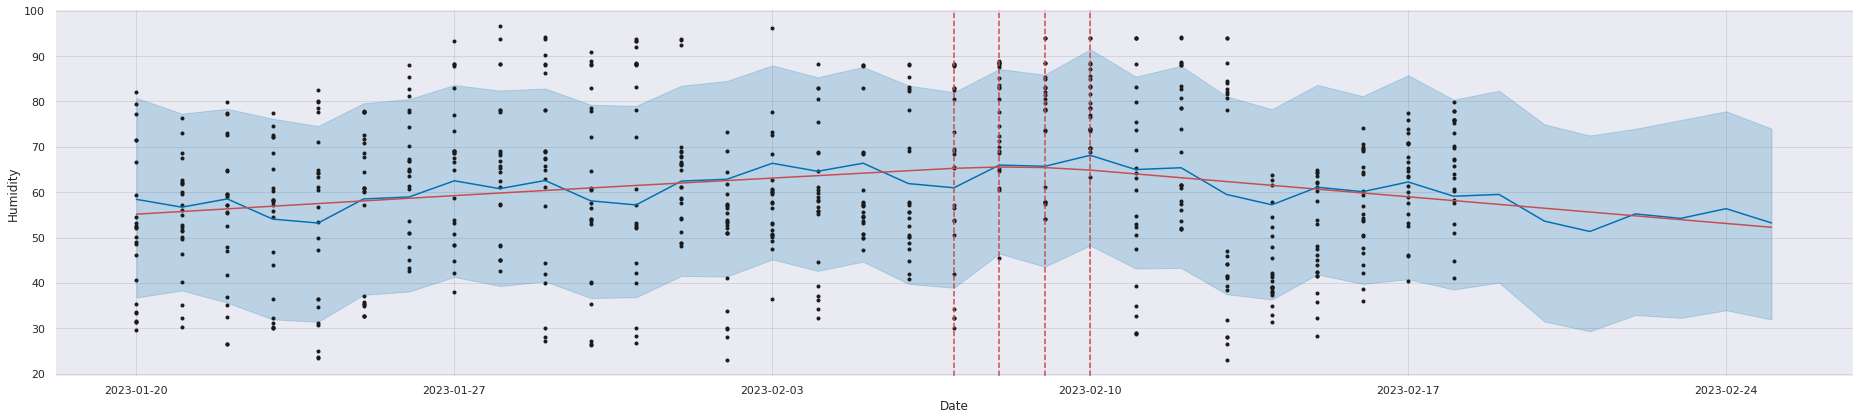

In [131]:
fig = model1.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model1, forecast)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

In [133]:
data1 = pd.read_csv('/content/Final dataset - CHITTAGONG 2023-01-20 to 2023-02-18.csv')
data1.head()

,Date,Time,Temparature(c),Humidity%
0,2023-01-20,0:00:00,15.2,71.49
1,2023-01-20,1:00:00,16.9,48.94
2,2023-01-20,2:00:00,16.3,50.14
3,2023-01-20,3:00:00,14.2,71.55
4,2023-01-20,4:00:00,15.6,52.07


In [134]:
model2 = Prophet()

In [135]:
df_for_temp=data1[['Date', 'Temparature(c)']]


In [136]:
df_for_temp

,Date,Temparature(c)
0,2023-01-20,15.2
1,2023-01-20,16.9
2,2023-01-20,16.3
3,2023-01-20,14.2
4,2023-01-20,15.6
...,...,...
715,2023-02-18,23.7
716,2023-02-18,23.7
717,2023-02-18,23.7
718,2023-02-18,22.8


In [137]:
df_for_temp['Date']=pd.to_datetime(df_for_temp['Date'])
df_for_temp.rename(columns = {'Date':'ds'}, inplace = True)
df_for_temp.rename(columns = {'Temparature(c)': 'y'}, inplace = True)


In [138]:
df_for_temp

,ds,y
0,2023-01-20,15.2
1,2023-01-20,16.9
2,2023-01-20,16.3
3,2023-01-20,14.2
4,2023-01-20,15.6
...,...,...
715,2023-02-18,23.7
716,2023-02-18,23.7
717,2023-02-18,23.7
718,2023-02-18,22.8


In [139]:
model2.fit(df_for_temp)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [140]:
future = model2.make_future_dataframe(periods = days)
future.tail(5)


,ds
32,2023-02-21
33,2023-02-22
34,2023-02-23
35,2023-02-24
36,2023-02-25


In [141]:
forecast = model2.predict(future)
predicted_data['Temparature(c)'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32,2023-02-21,21.268647,17.082549,25.543922
33,2023-02-22,21.520523,17.092971,25.461118
34,2023-02-23,21.861993,17.218035,26.199335
35,2023-02-24,21.044969,16.837732,25.517934
36,2023-02-25,21.416377,16.881256,25.831405


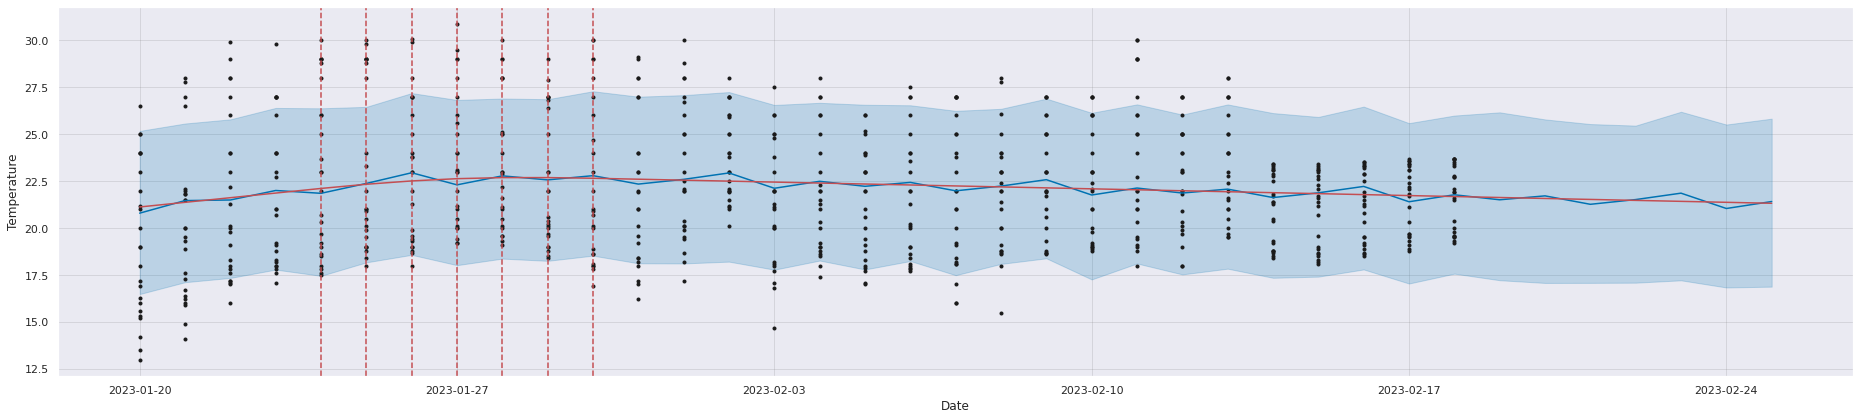

In [142]:
fig = model2.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model2, forecast)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

In [144]:
predicted_data.iloc[-7:,:]

,Date,Humidity%,Temparature(c)
30,2023-02-19,59.496735,21.509351
31,2023-02-20,53.614904,21.717620
32,2023-02-21,51.327467,21.268647
33,2023-02-22,55.204802,21.520523
34,2023-02-23,54.219886,21.861993
35,2023-02-24,56.362918,21.044969
36,2023-02-25,53.215721,21.416377


In [145]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity%"].values.reshape(-1,1)
y = data["Temparature(c)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-0.10560347]
beta =  [28.49799402]


Calculating some regression quality metrics
MSE =  8.87122800689842
R2 =  0.2617854287631435
